In [66]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                    
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [68]:
df = pd.read_csv('births.csv')

In [69]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [71]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


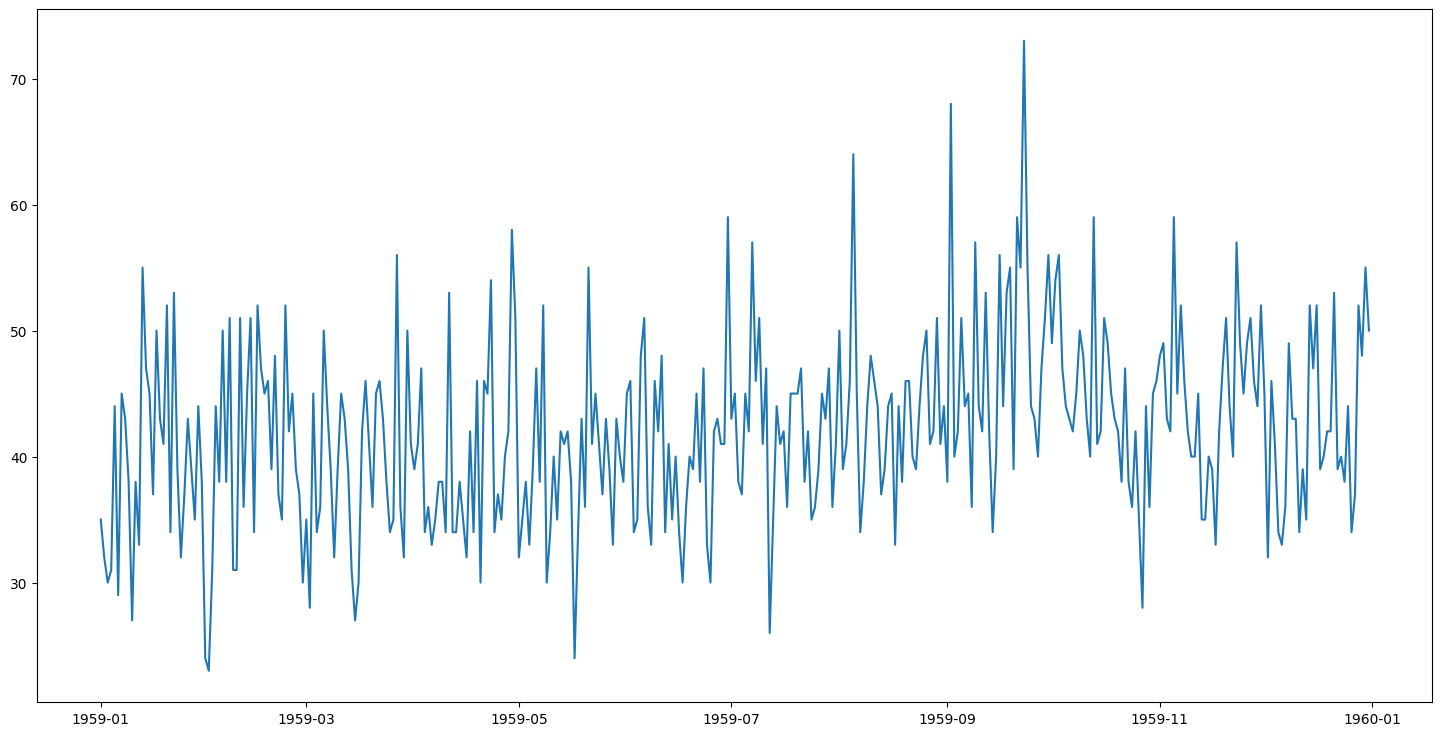

In [72]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Births"], linestyle="-")
plt.xlabel=('Date')
plt.ylabel=('Births')
plt.show();

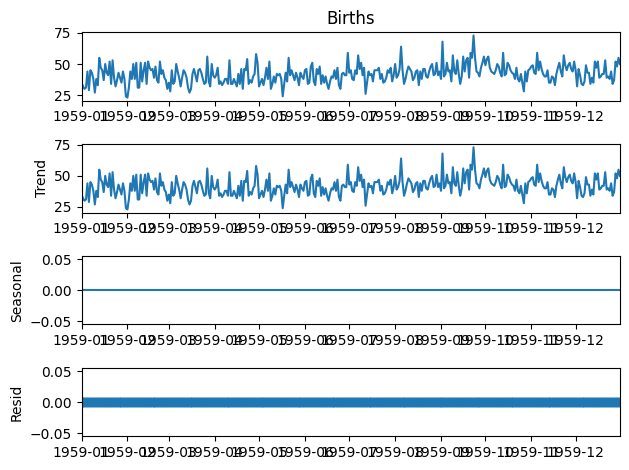

In [73]:
a = seasonal_decompose(df["Births"], model = "add", period=1)
a.plot();

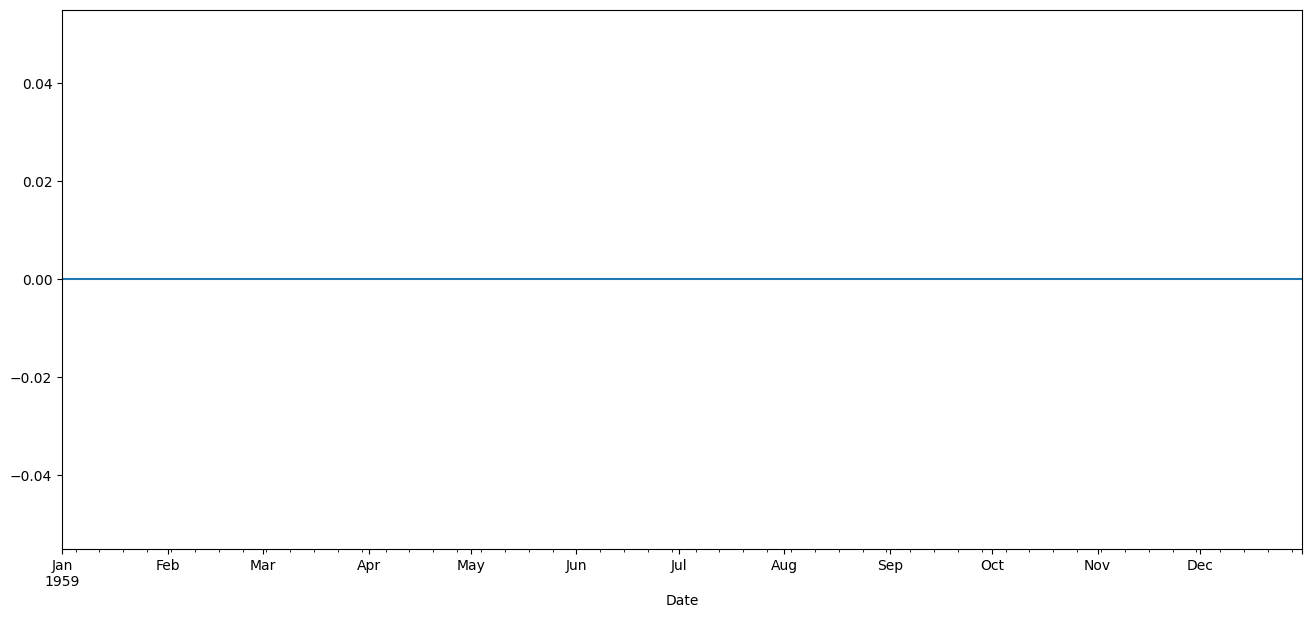

In [74]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [75]:
adf_test = adfuller(df["Births"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 5.2434129901498554e-05
it is a stationary process


In [76]:
test_data_size = 12
train_data = df[:len(df)-test_data_size].copy()
print(train_data)
test_data = df[len(df)-test_data_size:].copy()

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-15      47
1959-12-16      52
1959-12-17      39
1959-12-18      40
1959-12-19      42

[353 rows x 1 columns]


In [77]:
#arima_model = ARIMA(train_data['Births'],order=(1,1,1))

arima_model = SARIMAX(train_data['Births'],
               order=(1, 0, 1),
               seasonal_order=(7, 1, 2, 12))


arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  Births   No. Observations:                  353
Model:             SARIMAX(1, 0, 1)x(7, 1, [1, 2], 12)   Log Likelihood               -1166.137
Date:                                 Mon, 15 May 2023   AIC                           2356.273
Time:                                         16:25:33   BIC                           2402.256
Sample:                                     01-01-1959   HQIC                          2374.593
                                          - 12-19-1959                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9912      0.018     54.939      0.000       0.956       1.027
ma.L1         -0.9292      0.030    -30.519      0.000      -0.989      -0.870
ar.S.L12      -1.0918      0.526     -2.075      0.038      -2.123      -0.061
ar.S.L24      -0.1374      0.156     -0.882      0.378      -0.443       0.168
ar.S.L36       0.0323      0.141      0.229      0.819      -0.244       0.308
ar.S.L48       0.0346      0.125      0.276      0.782      -0.211       0.280
ar.S.L60       0.0493      0.125      0.393      0.695      -0.197       0.295
ar.S.L72       0.0782      0.133      0.587      0.557      -0.183       0.339
ar.S.L84       0.0195      0.097      0.201      0.841      -0.170       0.209
ma.S.L12      -0.0440      4.753     -0.009      0.993      -9.361       9.273
ma.S.L24      -0.9545      4.811     -0.198      0.843     -10.383       8.474
sigma2        48.6501    234.502      0.207      0.836    -410.965     508.265
===================================================================================
Ljung-Box (L1) (Q):                   2.21   Jarque-Bera (JB):                13.91
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.26
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.index = test_data.index
arima_pred

Date
1959-12-20    40.956384
1959-12-21    41.663960
1959-12-22    42.426858
1959-12-23    42.634324
1959-12-24    44.839850
1959-12-25    42.194228
1959-12-26    40.735045
1959-12-27    42.471435
1959-12-28    40.956302
1959-12-29    42.369766
1959-12-30    40.396568
1959-12-31    44.732868
Name: ARIMA Predictions, dtype: float64

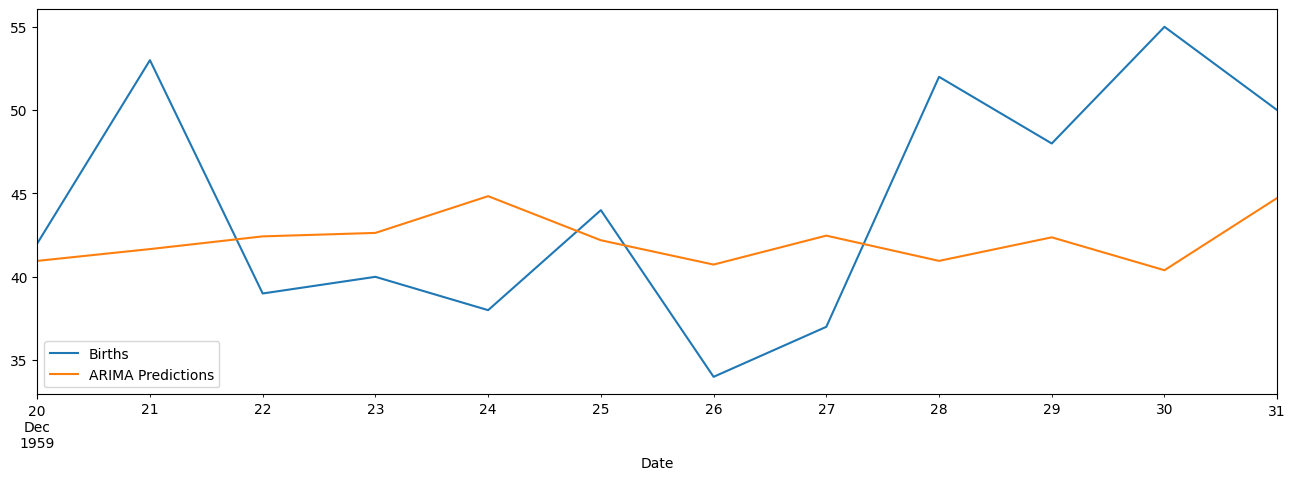

In [79]:
test_data['Births'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [80]:
arima_rmse_error = rmse(test_data['Births'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Births'], arima_pred)
mean_value = df['Births'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 55.69045308073066
RMSE Error: 7.462603639530285
Mean: 41.98082191780822


In [81]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

In [82]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [83]:
n_input = 12
n_features= 1

val_size = 60
train_size = scaled_train_data.shape[0]

scaled_train_data_copy = scaled_train_data[:train_size - val_size].copy()
scaled_val_data_copy = scaled_train_data[train_size - val_size:].copy()

generator = TimeseriesGenerator(scaled_train_data_copy, scaled_train_data_copy, length=n_input, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_val_data_copy,scaled_val_data_copy,length=n_input, batch_size=1)

In [84]:
from tensorflow.keras import layers, models, Input

#lstm_model = Sequential()
#lstm_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#lstm_model.add(Dense(1))

'''
lstm_model = tf.keras.Sequential([
    Input(shape=(n_input, n_features)),
    layers.LSTM(100),
    layers.Dense(40, activation='relu'),
    layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()
'''

lstm_model = Sequential()
# model.add(GRU(10, activation='relu', input_shape=(length,1)))
lstm_model.add(GRU(20, activation='relu', return_sequences=True, input_shape=(n_input,1)))
lstm_model.add(GRU(10, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 12, 20)            1380      
                                                                 
 gru_7 (GRU)                 (None, 10)                960       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 40
early_stop = EarlyStopping(monitor='val_loss',patience=10)
ckpt = ModelCheckpoint('model6.hdf5', save_best_only=True, monitor='val_loss', verbose=1)
lstm_model.fit_generator(
    generator,
    steps_per_epoch=len(generator),
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop, ckpt])

Epoch 1/40
281/281 [==============================] - ETA: 0s - loss: 0.0286
Epoch 1: val_loss improved from inf to 0.01594, saving model to model6.hdf5
281/281 [==============================] - 22s 68ms/step - loss: 0.0286 - val_loss: 0.0159
Epoch 2/40
281/281 [==============================] - ETA: 0s - loss: 0.0223
Epoch 2: val_loss did not improve from 0.01594
281/281 [==============================] - 17s 62ms/step - loss: 0.0223 - val_loss: 0.0197
Epoch 3/40
281/281 [==============================] - ETA: 0s - loss: 0.0224
Epoch 3: val_loss did not improve from 0.01594
281/281 [==============================] - 19s 66ms/step - loss: 0.0224 - val_loss: 0.0166
Epoch 4/40
281/281 [==============================] - ETA: 0s - loss: 0.0227
Epoch 4: val_loss did not improve from 0.01594
281/281 [==============================] - 17s 62ms/step - loss: 0.0227 - val_loss: 0.0160
Epoch 5/40
281/281 [==============================] - ETA: 0s - loss: 0.0220
Epoch 5: val_loss did not improve 

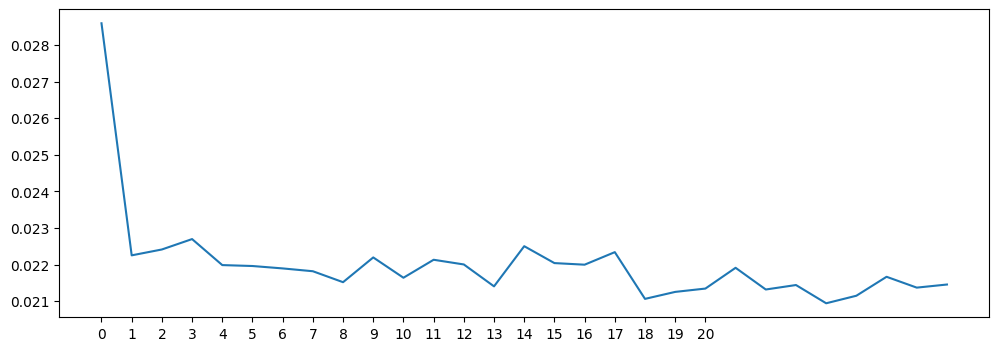

In [86]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [87]:
lstm_predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.52]
 [0.4 ]
 [0.4 ]
 [0.22]
 [0.32]
 [0.24]
 [0.58]
 [0.48]
 [0.58]
 [0.32]
 [0.34]
 [0.38]]
shape is  (12, 1)
current batch
[[[0.52]
  [0.4 ]
  [0.4 ]
  [0.22]
  [0.32]
  [0.24]
  [0.58]
  [0.48]
  [0.58]
  [0.32]
  [0.34]
  [0.38]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 310ms/step
current_batch now
 [[[0.4       ]
  [0.4       ]
  [0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  [0.32      ]
  [0.34      ]
  [0.38      ]
  [0.43309537]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 22ms/step
current_batch now
 [[[0.4       ]
  [0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  [0.32      ]
  [0.34      ]
  [0.38      ]
  [0.43309537]
  [0.4328129 ]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 22ms/step
current_batch now
 [[[0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  

In [88]:
lstm_predictions_scaled

[array([0.43309537], dtype=float32),
 array([0.4328129], dtype=float32),
 array([0.43428883], dtype=float32),
 array([0.43597147], dtype=float32),
 array([0.43870857], dtype=float32),
 array([0.44058985], dtype=float32),
 array([0.44274932], dtype=float32),
 array([0.4425569], dtype=float32),
 array([0.44315404], dtype=float32),
 array([0.44295558], dtype=float32),
 array([0.44459936], dtype=float32),
 array([0.4459046], dtype=float32)]

In [89]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [90]:
global_test_data['LSTM_Predictions'] = lstm_predictions

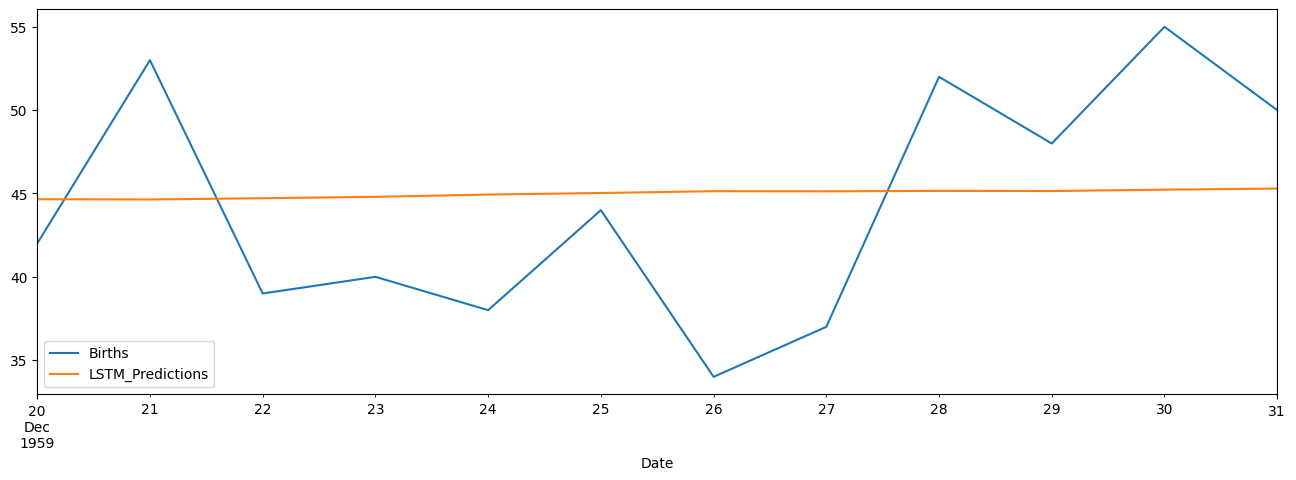

In [91]:
global_test_data['Births'].plot(figsize = (16,5), legend=True)
global_test_data['LSTM_Predictions'].plot(legend = True);

In [92]:
lstm_rmse_error = rmse(global_test_data['Births'], global_test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
lstm_mae_error = mean_absolute_error(global_test_data['Births'], global_test_data["LSTM_Predictions"])
mean_value = df['Births'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 45.3677814570497
RMSE Error: 6.735560960829447
Mean: 41.98082191780822


In [93]:
rmse_errors = [arima_rmse_error, lstm_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error]
mae_errors = [arima_mae_error, lstm_mae_error]

In [94]:
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors,"MAE Errors": mae_errors})

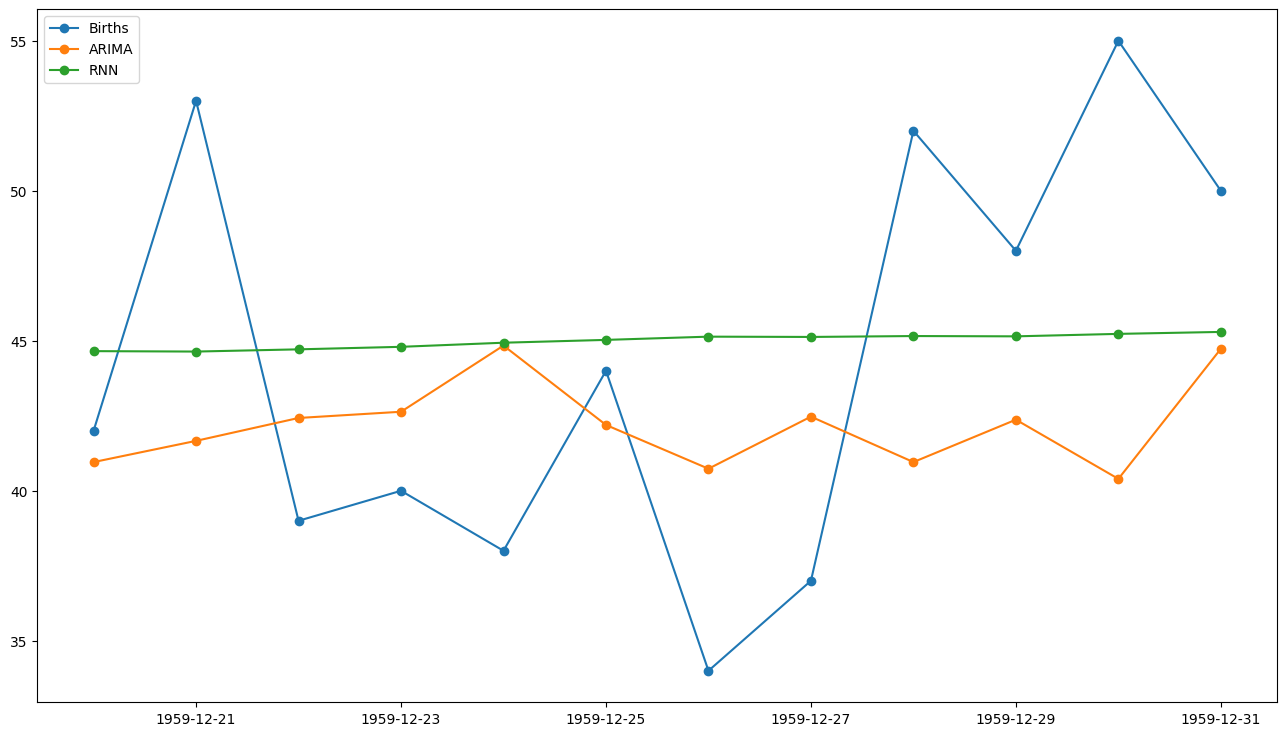

In [95]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Births"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["LSTM_Predictions"], linestyle="-")
plt.legend(["Births", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [96]:
print(f"Mean: {global_test_data['Births'].mean()}")
errors

Mean: 44.333333333333336


,Models,RMSE Errors,MSE Errors,MAE Errors
0,ARIMA,7.462604,55.690453,6.319786
1,LSTM,6.735561,45.367781,6.077224


In [97]:
global_test_data

,Births,ARIMA_Predictions,LSTM_Predictions
Date,,,
1959-12-20,42,40.956384,44.654768
1959-12-21,53,41.663960,44.640645
1959-12-22,39,42.426858,44.714441
1959-12-23,40,42.634324,44.798573
1959-12-24,38,44.839850,44.935429
1959-12-25,44,42.194228,45.029492
1959-12-26,34,40.735045,45.137466
1959-12-27,37,42.471435,45.127844
1959-12-28,52,40.956302,45.157702
